In [2]:
# exactly the same results.


from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from fastai.tabular import core

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('data/churn_train.csv')
test = pd.read_csv('data/churn_test.csv')

In [4]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [5]:
df.info

<bound method DataFrame.info of        avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0          6.94                   5.0                   5.0       1.00   
1          8.06                   5.0                   5.0       1.00   
2         21.50                   4.0                   NaN       1.00   
3          9.46                   5.0                   NaN       2.75   
4         13.77                   5.0                   NaN       1.00   
...         ...                   ...                   ...        ...   
39995      2.06                   4.8                   4.3       1.08   
39996      2.05                   5.0                   5.0       1.00   
39997      3.04                   5.0                   5.0       1.00   
39998      3.49                   4.3                   3.3       1.50   
39999      4.25                   4.7                   5.0       1.00   

                 city last_trip_date    phone signup_date  surge_pct  \
0      

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                40000 non-null  float64
 1   avg_rating_by_driver    39838 non-null  float64
 2   avg_rating_of_driver    33472 non-null  float64
 3   avg_surge               40000 non-null  float64
 4   city                    40000 non-null  object 
 5   last_trip_date          40000 non-null  object 
 6   phone                   39681 non-null  object 
 7   signup_date             40000 non-null  object 
 8   surge_pct               40000 non-null  float64
 9   trips_in_first_30_days  40000 non-null  int64  
 10  luxury_car_user         40000 non-null  bool   
 11  weekday_pct             40000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [7]:
df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2.06,4.8,4.3,1.08,Winterfell,2014-04-02,Android,2014-01-26,9.5,8,False,90.5
39996,2.05,5.0,5.0,1.00,King's Landing,2014-05-09,iPhone,2014-01-08,0.0,2,False,85.7
39997,3.04,5.0,5.0,1.00,Winterfell,2014-06-24,Android,2014-01-04,0.0,3,True,33.3
39998,3.49,4.3,3.3,1.50,Astapor,2014-02-09,iPhone,2014-01-08,40.0,5,False,60.0


In [8]:
df.groupby('active').count()

KeyError: 'active'

In [9]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [10]:
df['active'] = np.where(df['last_trip_date'] >= '2014-06-01', 1, 0)

In [11]:
fillna = df.copy()

In [12]:
fillna['avg_rating_by_driver'].fillna(value=fillna['avg_rating_by_driver'].mean(), inplace=True)
fillna['avg_rating_of_driver'].fillna(value=fillna['avg_rating_of_driver'].mean(), inplace=True)
fillna['phone'].fillna(value='Unknown', inplace=True)

In [13]:
test = test.copy()

In [14]:
test['last_trip_date'] = pd.to_datetime(test['last_trip_date'])
test['signup_date'] = pd.to_datetime(test['signup_date'])

In [15]:
test['active'] = np.where(test['last_trip_date'] >= '2014-06-01', 1, 0)

In [16]:
test['avg_rating_by_driver'].fillna(value=fillna['avg_rating_by_driver'].mean(), inplace=True)
test['avg_rating_of_driver'].fillna(value=fillna['avg_rating_of_driver'].mean(), inplace=True)
test['phone'].fillna(value='Unknown', inplace=True)

test['active'] = np.where(test['last_trip_date'] >= '2014-06-01', 1, 0)

In [17]:
test = pd.get_dummies(test)

In [18]:
test_new = test.drop(['last_trip_date'], axis=1)

In [19]:
X_test_df = test_new.drop('active', axis = 1)
X_test = X_test_df.values
y_test = test['active'].values

In [20]:
dummies_test = test_new.copy()
core.add_datepart(dummies_test, field_name='signup_date')

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,signup_Week,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active,...,signup_Day,signup_Dayofweek,signup_Dayofyear,signup_Is_month_end,signup_Is_month_start,signup_Is_quarter_end,signup_Is_quarter_start,signup_Is_year_end,signup_Is_year_start,signup_Elapsed
0,2.48,5.0,5.000000,2,1.00,0.0,2,True,100.0,0,...,6,0,6,False,False,False,False,False,False,1388966400
1,10.81,5.0,5.000000,2,1.00,0.0,3,True,100.0,0,...,6,0,6,False,False,False,False,False,False,1388966400
2,12.95,5.0,5.000000,3,1.00,0.0,1,True,100.0,0,...,19,6,19,False,False,False,False,False,False,1390089600
3,3.92,5.0,4.601697,2,1.00,0.0,0,False,0.0,0,...,9,3,9,False,False,False,False,False,False,1389225600
4,1.46,5.0,4.500000,2,1.00,0.0,2,False,100.0,0,...,7,1,7,False,False,False,False,False,False,1389052800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.11,5.0,5.000000,5,1.00,0.0,1,False,100.0,0,...,31,4,31,True,False,False,False,False,False,1391126400
9996,5.49,4.9,4.100000,5,1.00,0.0,0,True,33.3,0,...,30,3,30,False,False,False,False,False,False,1391040000
9997,2.49,4.2,4.600000,3,1.25,18.8,9,True,90.6,0,...,15,2,15,False,False,False,False,False,False,1389744000
9998,1.05,4.0,5.000000,4,1.00,0.0,1,False,100.0,0,...,22,2,22,False,False,False,False,False,False,1390348800


In [21]:
X_test_df = dummies_test.drop('active', axis = 1)
X_test = X_test_df.values
y_test = test['active'].values

In [22]:
fillna = pd.get_dummies(fillna)

fillna_new = fillna.drop(['last_trip_date'], axis=1)

In [23]:
dummies = fillna_new.copy()
core.add_datepart(dummies, field_name='signup_date')

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,signup_Week,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active,...,signup_Day,signup_Dayofweek,signup_Dayofyear,signup_Is_month_end,signup_Is_month_start,signup_Is_quarter_end,signup_Is_quarter_start,signup_Is_year_end,signup_Is_year_start,signup_Elapsed
0,6.94,5.0,5.000000,2,1.00,0.0,0,False,100.0,0,...,12,6,12,False,False,False,False,False,False,1389484800
1,8.06,5.0,5.000000,4,1.00,0.0,2,True,0.0,0,...,25,5,25,False,False,False,False,False,False,1390608000
2,21.50,4.0,4.601697,1,1.00,0.0,1,True,100.0,0,...,2,3,2,False,False,False,False,False,False,1388620800
3,9.46,5.0,4.601697,2,2.75,100.0,1,False,100.0,0,...,9,3,9,False,False,False,False,False,False,1389225600
4,13.77,5.0,4.601697,5,1.00,0.0,0,False,100.0,0,...,31,4,31,True,False,False,False,False,False,1391126400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2.06,4.8,4.300000,4,1.08,9.5,8,False,90.5,0,...,26,6,26,False,False,False,False,False,False,1390694400
39996,2.05,5.0,5.000000,2,1.00,0.0,2,False,85.7,0,...,8,2,8,False,False,False,False,False,False,1389139200
39997,3.04,5.0,5.000000,1,1.00,0.0,3,True,33.3,1,...,4,5,4,False,False,False,False,False,False,1388793600
39998,3.49,4.3,3.300000,2,1.50,40.0,5,False,60.0,0,...,8,2,8,False,False,False,False,False,False,1389139200


In [24]:
X_train_df = dummies.drop('active', axis = 1)
X_train = (X_train_df.values)
y_train = dummies['active'].values

In [25]:
rf = RandomForestClassifier()

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
print("\n8. score:", rf.score(X_test, y_test))


8. score: 0.7594


In [28]:
y_predict = rf.predict(X_test)
print("\n9. confusion matrix:")
print(confusion_matrix(y_test, y_predict))


9. confusion matrix:
[[5194 1034]
 [1372 2400]]


In [28]:
# 10. What is the precision? Recall?
print("\n10. precision:", precision_score(y_test, y_predict))
print("    recall:", recall_score(y_test, y_predict))


10. precision: 0.6993027309703661
    recall: 0.6381230116648993


In [29]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, max_features=8)
rf.fit(X_train, y_train)
print("\n11: accuracy score:", rf.score(X_test, y_test))
print("    out of bag score:", rf.oob_score_)


11: accuracy score: 0.7622
    out of bag score: 0.76565


In [30]:
feature_importances = np.argsort(rf.feature_importances_)
print("\n12: top five:", list(X_train_df.columns[feature_importances[-1:-6:-1]]))


12: top five: ['avg_dist', 'weekday_pct', 'avg_rating_by_driver', 'avg_rating_of_driver', 'trips_in_first_30_days']


In [31]:
features = list(feature_importances)[-5:]

In [32]:
features

[6, 2, 1, 8, 0]

Text(0.5, 0.98, 'Partial dependence of house value on non-location features\nfor the California housing dataset, with MLPRegressor')

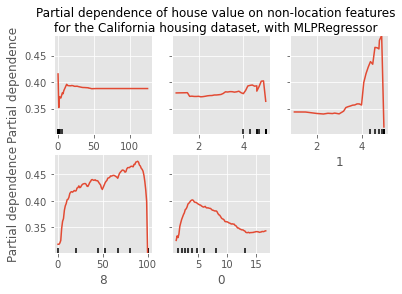

In [35]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(rf, X_train, features)
fig = plt.gcf()
fig.suptitle('Partial dependence of house value on non-location features\n'
             'for the California housing dataset, with MLPRegressor')


13. Feature ranking:
1. avg_dist (0.184895)
2. weekday_pct (0.116617)
3. avg_rating_by_driver (0.096737)
4. avg_rating_of_driver (0.071889)
5. trips_in_first_30_days (0.071292)
6. surge_pct (0.070778)
7. avg_surge (0.062531)
8. luxury_car_user (0.034638)
9. city_Astapor (0.018699)
10. signup_Week (0.014146)


Text(0.5, 1.0, 'Feature Importances')

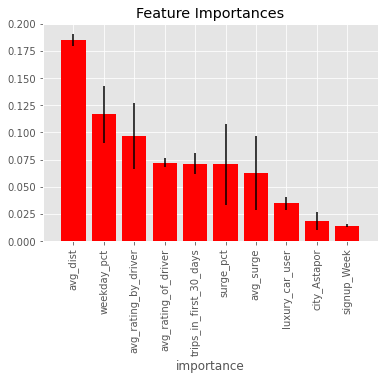

In [36]:
n = 10 # top 10 features

#importances = forest_fit.feature_importances_[:n]
importances = rf.feature_importances_[:n]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = list(X_train_df.columns[indices])

# Print the feature ranking
print("\n13. Feature ranking:")

for f in range(n):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots()

ax.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
ax.set_xticks(range(10))
ax.set_xticklabels(features, rotation = 90)
ax.set_xlim([-1, 10])
ax.set_xlabel("importance")
ax.set_title("Feature Importances")

In [58]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X_train, y_train, n_repeats=10, random_state=0)

KeyboardInterrupt: 

In [ ]:
num_trees = range(5, 70, 5)
accuracies = []
for n in num_trees:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
fig, ax = plt.subplots()
ax.plot(num_trees, accuracies)
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Accuracy")
ax.set_title('Accuracy vs Num Trees')

In [44]:
num_features = range(1, len(fillna.columns) + 1)
accuracies = []
for n in num_features:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(max_features=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
fig, ax = plt.subplots()
ax.plot(num_features, accuracies)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title('Accuracy vs Num Features')

ValueError: max_features must be in (0, n_features]

In [ ]:
def get_scores(classifier, X_train, X_test, y_train, y_test, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), \
           precision_score(y_test, y_predict), \
           recall_score(y_test, y_predict)

print("\n16. Model, Accuracy, Precision, Recall")
print("    Random Forest:", get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, n_estimators=40, max_features=10))
print("    Logistic Regression:", get_scores(LogisticRegression, X_train, X_test, y_train, y_test))
print("    Decision Tree:", get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test))
print("    Naive Bayes:", get_scores(MultinomialNB, X_train, X_test, y_train, y_test))

In [36]:
pip install fastai

     |████████████████████████████████| 188 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 10.1 MB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 108.1 MB 51 kB/s s eta 0:00:01
     |████████████████████████████████| 1.0 MB 16.4 MB/s eta 0:00:01
     |████████████████████████████████| 287 kB 19.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 27.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 21.7 MB/s eta 0:00:01
     |████████████████████████████████| 263 kB 15.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [37]:
from fastai.tabular import core
dummies = fillna.copy()
core.add_datepart(dummies, field_name='signup_date')

In [39]:
dummies = fillna.copy()
core.add_datepart(dummies, field_name='signup_date')

In [40]:
core.add_datepart(dummies, field_name='signup_date')

KeyError: 'signup_date'

In [41]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(rf, X_train, features) 

NameError: name 'features' is not defined

In [43]:
features = [3, 2, (3, 2)]
plot_partial_dependence(rf, X_train, features, target=0) 

KeyboardInterrupt: 

In [46]:
clf = DecisionTreeClassifier()
    
    # Fit our tree
clf.fit(X_train, y_train)

    # Make predictions
y_pred = clf.predict(X_test)

    # Find the precision, recall, and score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
score = clf.score(X_test, y_test)

In [47]:
precision

0.6163076083992365

In [48]:
recall

0.5991516436903499

In [49]:
score

0.7081